In [48]:
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#### Описание данных
There are 13 attributes<br />

age: age in years<br />
sex: sex (1 = male; 0 = female)<br />
cp: chest pain type<br />
-- Value 0: typical angina<br />
-- Value 1: atypical angina<br />
-- Value 2: non-anginal pain<br />
-- Value 3: asymptomatic<br />
trestbps: resting blood pressure (in mm Hg on admission to the hospital)<br />
chol: serum cholestoral in mg/dl<br />
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br />
restecg: resting electrocardiographic results<br />
-- Value 0: normal<br />
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br />
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br />
thalach: maximum heart rate achieved<br />
exang: exercise induced angina (1 = yes; 0 = no)<br />
oldpeak = ST depression induced by exercise relative to rest<br />
slope: the slope of the peak exercise ST segment<br />
-- Value 0: upsloping<br />
-- Value 1: flat<br />
-- Value 2: downsloping<br />
ca: number of major vessels (0-3) colored by flourosopy<br />
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect<br />
and the label<br />
condition: 0 = no disease, 1 = disease<br />

In [8]:
data = pd.read_csv('../data/raw/heart_cleveland_upload.csv')
data.info(verbose=True, null_counts=True)

# отлично, пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


/home/denis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [9]:
data.duplicated().sum()

# дубликатов тоже нет - супер

0

In [11]:
# посмотрим на характеристики фич

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [16]:
# на баланс таргета

data['condition'].value_counts()

# классы +- сбалансированы - супер

0    160
1    137
Name: condition, dtype: int64

In [20]:
# для остальных полей посмотрим количество уникальных значений

for column in [column for column in data.columns if column != 'condition']:
    print(f'{column}: {len(data[column].unique())}')

age: 41
sex: 2
cp: 4
trestbps: 50
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 4
thal: 3


In [23]:
# корреляции

data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


<AxesSubplot:>

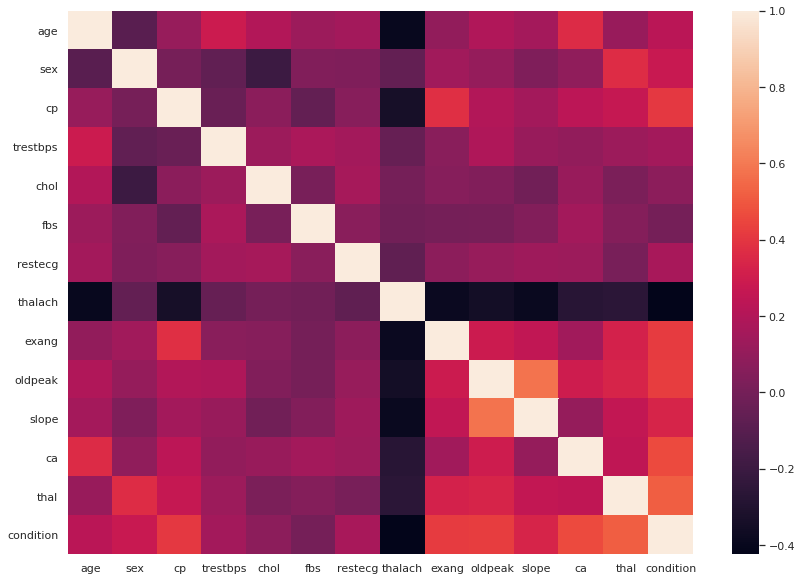

In [28]:
sns.set(rc={'figure.figsize':(14,10)})
sns.heatmap(data.corr())

In [133]:
# Датасет небольшой. Пропусков в данных и дубликатов нет. Классов всего два, +- сбалансированы.
# Фичи числовые, их дополнительная предобработка не является обязательной для ряда возможных моделей.
# Часть фич имеют не нулевую корреляцию с таргетом, что обнадеживает

#### Посмотрим что сможет случайный лес с дефолтными г. параметрами обучения

In [84]:
target_column = 'condition'
features_columns = [x for x in data.columns if x != target_column]

X_train, X_test, y_train, y_test = train_test_split(data[features_columns],
                                                    data[target_columns],
                                                    test_size=0.3,
                                                    random_state=42)
print(f'Train: {len(X_train)}. Test: {len(X_test)}')

Train: 207. Test: 90


In [123]:
clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)

test_predictions = clf.predict(X_test)
train_predictions = clf.predict(X_train)

In [129]:
accuracy_test = metrics.accuracy_score(y_test, test_predictions)
f1_test = metrics.f1_score(y_test, test_predictions)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, test_predictions).ravel()

accuracy_train = metrics.accuracy_score(y_train, train_predictions)
f1_train = metrics.f1_score(y_train, train_predictions)


print(f'Train. Accuracy: {accuracy_train}. F1: {f1_train}')
print(f'Test. Accuracy: {accuracy_test}. F1: {f1_test}')
print(f'tn={tn}, fp={fp}, fn={fn}, tp={tp}')

Train. Accuracy: 1.0. F1: 1.0
Test. Accuracy: 0.8111111111111111. F1: 0.8
tn=39, fp=9, fn=8, tp=34


In [136]:
# Результат "не нулевой", можно работать. Как минимум можно попробовать "упростить модель" с целью увеличить
# её обобщающую способность. Конечно зависит от целей, но я бы ещё постарался подобрать другой порог
# отсечения - люди не должны умирать из-за того что их вовремя не диагностировали (fn=8).